In [1]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

from seisnet import ProbPhaseArrival, ProbPhaseExist
from seisnet.utils import spectrogram_transform

### Divide and Conquer Model

In [2]:
model1 = ProbPhaseExist()
model2 = ProbPhaseArrival()

# Dimension testing
n_samples = 140
in_chan = 3
win_len = 500

x = torch.rand(n_samples, in_chan, win_len)
xspec = spectrogram_transform(x)

print(f"xspec dimensions = {xspec.shape}") # (n_samples, in_chan, 126, 126)

y1 = model1(xspec)
y2 = model2(x)
print(f"model1 output dimensions = {y1.shape}") # (n_samples,)
print(f"model2 output dimensions = {y2.shape}") # (n_samples, win_len)

xspec dimensions = torch.Size([140, 3, 126, 126])
model1 output dimensions = torch.Size([140])
model2 output dimensions = torch.Size([140, 500])


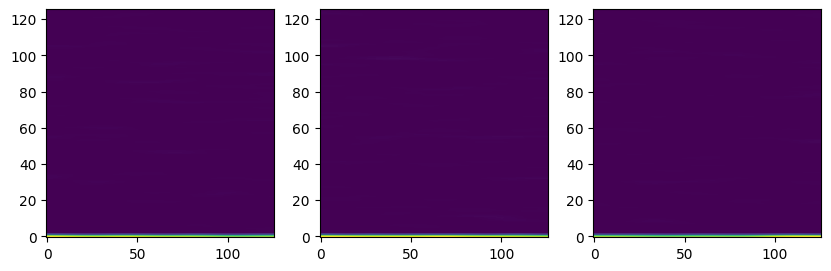

In [3]:
fig,axs = plt.subplots(1,3,figsize=(10,3))
for idx,ax in enumerate(axs):
    ax.imshow(xspec[12 ,idx],origin="lower")